# NUMPY - Advanced

## Copies and views

When operating and manipulating arrays, their data is sometimes copied to a new array and sometimes not. This can be very confusing. There are three cases:

#### Simple assignments do not copy the array

In [1]:
import numpy as np

In [2]:
A = np.arange(12)
print(A)
B = A            # A new array is not created
B is A           # A and B are two names for the same array

[ 0  1  2  3  4  5  6  7  8  9 10 11]


True

In [3]:
B.shape = 3,4    # For example, changing the form A B, changes the form to A
A.shape
print(A)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [4]:
B[0,:] = 80

print(A)

[[80 80 80 80]
 [ 4  5  6  7]
 [ 8  9 10 11]]


Python passes arrays 'as a reference', so calls to functions do not copy.

In [5]:
def f(X):
    '''
    Una función que espera un array X y cambia X[0] a 2.0
    '''
    X[0] = 2.0
    

A = np.ones([4,5])   # <--- array of about 4 rows and 5 columns

print('Antes de llamar a la función:', A[0])          # <--- Print the first row

f(A)

print('After calling the function:', A[0])                        

Antes de llamar a la función: [1. 1. 1. 1. 1.]
After calling the function: [2. 2. 2. 2. 2.]


#### Views. 
Different arrays can share the same data. The view method creates a new array that "looks" for the same data.

In [6]:
print(A)
C = A.view()
C is A

[[2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


False

In [7]:
C.shape = 2,6                      # Change the C form, does not change the one
print(C)
A.shape

ValueError: cannot reshape array of size 20 into shape (2,6)

In [8]:
C[0,:] = 3.0                         # But change C data, change the data from A
A

array([[3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

Making a slice of an array returns a view:

In [9]:
S = A[1:3]     
S[:] = 10           
A

array([[ 3.,  3.,  3.,  3.,  3.],
       [10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10.],
       [ 1.,  1.,  1.,  1.,  1.]])

#### Copy

In [10]:
D = A.copy()                          # A new array is created and the data is copied
D is A

False

In [11]:
D[0] = 23
print(D)
print(A)

[[23. 23. 23. 23. 23.]
 [10. 10. 10. 10. 10.]
 [10. 10. 10. 10. 10.]
 [ 1.  1.  1.  1.  1.]]
[[ 3.  3.  3.  3.  3.]
 [10. 10. 10. 10. 10.]
 [10. 10. 10. 10. 10.]
 [ 1.  1.  1.  1.  1.]]


## Indexado (more sophisticated)

Numpy offers more indexation techniques than the regular Python sequences. In addition to indexing whole and sectors, as we saw earlier, arrays can be indexed by means of integers and logical arrays.


### Indexed with an array of indices¶

In [12]:
import numpy as np

In [13]:
A = np.arange(12)**2                       # Square array of the numbers from 0 to 11
print(A)

I = np.array([1, 1, 3, 8, 5])              # index array

A[I]                                       # The elements of A in the positions given by i

[  0   1   4   9  16  25  36  49  64  81 100 121]


array([ 1,  1,  9, 64, 25])

In [14]:
J = np.array([[3, 4], [9, 7]])      # Bidimensional array of indices

A[J]                                # <--- In the same way as J

array([[ 9, 16],
       [81, 49]])

When the indexed array is multidimensional, an array of indices refers to the first dimension of the indexed array.

The following example shows this behavior by converting an 'grayscale' image into a 'thruecolor' (or RGB) image using a palette.

In [15]:
paleta = np.array( [ [0.0, 0.0, 0.0],              # negro
                      [1.0, 0.0, 0.0],             # rojo
                      [0.0, 1.0, 0.0],             # verde
                      [0.0, 0.0, 1.0],             # azul
                      [1.0, 1.0, 1.0] ] )          # blanco

imagen = np.array([[ 0, 1, 2, 0 ],           # Each value, serves as an index on the colors map (palette)
                   [ 0, 3, 4, 0 ]])

print(imagen.shape)
print(paleta[imagen].shape)                         

(2, 4)
(2, 4, 3)


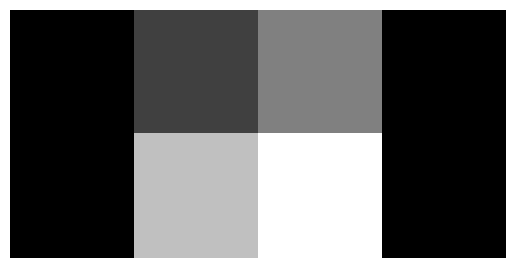

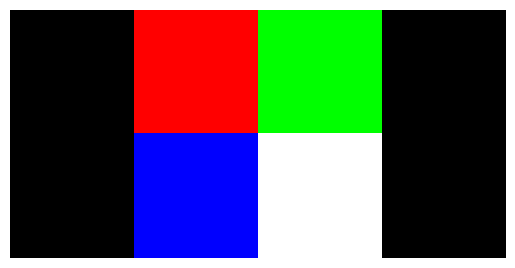

In [16]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(imagen, cmap = 'gray')
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(paleta[imagen], cmap = 'gray')
plt.axis('off')
plt.show()

We can also provide indices for more than one dimension. Index arrays for each dimension must have the same form.

In [17]:
A = np.arange(12).reshape(3,4)
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [18]:
I = np.array([[0,1],                        # Indices for the first dimension of A
              [1,2]])

J = np.array([[2,1],                        # Indices for the second dimension of A
              [3,3]])

A[I,J]                                      # I and J must have the same form

array([[ 2,  5],
       [ 7, 11]])

In [19]:
A[I,2]

array([[ 2,  6],
       [ 6, 10]])

In [20]:
A[:,J]                                     

array([[[ 2,  1],
        [ 3,  3]],

       [[ 6,  5],
        [ 7,  7]],

       [[10,  9],
        [11, 11]]])

We can put I and J on a list and then do the indexation with the list

In [21]:
L = [I,J]
print(L)

A[L]                                       # equivalent to a [i, j]

[array([[0, 1],
       [1, 2]]), array([[2, 1],
       [3, 3]])]


IndexError: index 3 is out of bounds for axis 0 with size 3

However, we cannot do this by putting I and J in an array, since this array will be interpreted as indexing the first dimension of A.

In [22]:
S = np.array([I,J])
print(S)

A[S]                                       # It is not the same as seen above

[[[0 1]
  [1 2]]

 [[2 1]
  [3 3]]]


IndexError: index 3 is out of bounds for axis 0 with size 3

In [23]:
A[tuple(S)]                                # The same as [I, J]

array([[ 2,  5],
       [ 7, 11]])

Another example of indexation with indices arrays is the search for the maximum value of series dependent:

In [24]:
time = np.linspace(20, 145, 5)                 # arbitrary array that simulates time
data = np.random.random((5,4))                 # 4 arbitrary series (columns) that simulate depending on the time

print(time)

print(data)

[ 20.    51.25  82.5  113.75 145.  ]
[[0.89284415 0.61269594 0.7876821  0.36552193]
 [0.29815616 0.62497209 0.36747755 0.57699058]
 [0.21903457 0.27574025 0.47781538 0.31283069]
 [0.81254709 0.54611665 0.13458911 0.43436873]
 [0.15551963 0.80973763 0.88075395 0.73324318]]


In [25]:
ind = data.argmax(axis=0)                   # Maximum indices for each column
ind

array([0, 4, 4, 4])

In [26]:
time_max = time[ind]                        # times corresponding to the maximum
data_max = data[ind, range(data.shape[1])]  # => data[ind[0],0], data[ind[1],1]...

print(time_max)

print(data_max)

[ 20. 145. 145. 145.]
[0.89284415 0.80973763 0.88075395 0.73324318]


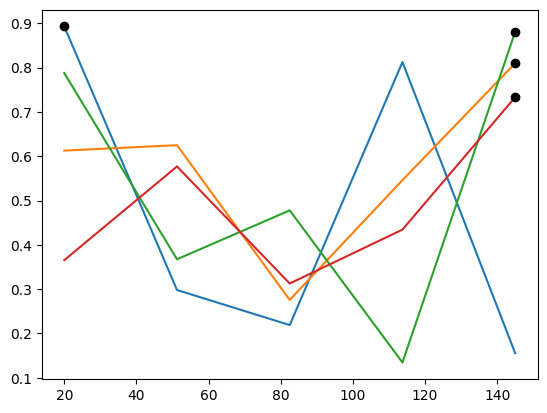

In [27]:
# graphing the results ...

plt.figure()
plt.plot(time, data)
plt.plot(time_max, data_max, 'ok')
plt.show()

You can also use indexation to assign values ​​to arrays:

In [28]:
A = np.arange(5)
A

array([0, 1, 2, 3, 4])

In [29]:
A[[1,3,4]] = 0
A

array([0, 0, 2, 0, 0])

However, when the indices list contains repetitions, the allocation is made several times, stepping on the last value:

In [30]:
A = np.arange(5)
A

array([0, 1, 2, 3, 4])

In [31]:
A[[0,0,2]] = [1,2,3]
A

array([2, 1, 3, 3, 4])

### Logical

In [32]:
A = np.arange(12).reshape(3,4)
B = A > 4

print(A)
print(B)                                          # B is a logical array of the same form as

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[False False False False]
 [False  True  True  True]
 [ True  True  True  True]]


In [33]:
A[B]                                       # Array 1d with the elements of where b is true

array([ 5,  6,  7,  8,  9, 10, 11])

This is very useful to make assignments based on a criterion:

In [34]:
A[B] = 0                                   # This makes all the elements that are greater than 4
A

array([[0, 1, 2, 3],
       [4, 0, 0, 0],
       [0, 0, 0, 0]])

As an example, logical indexing, we will try to segment the "soft tissue" of a fantome:

In [35]:
import matplotlib.pyplot as plt

I = plt.imread('./Data/cirs_slice.png')[...,0]


plt.figure(figsize = (6,6))
plt.imshow(I, cmap = 'gray')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './Data/cirs_slice.png'

AttributeError: Rectangle.set() got an unexpected keyword argument 'normed'

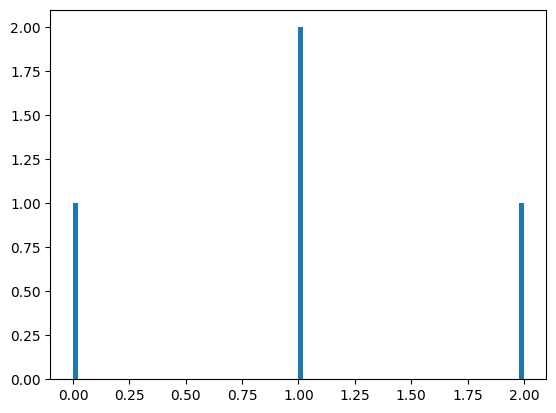

In [36]:
plt.figure()
plt.hist(I.ravel(), bins=100, normed=1)       # matplotlib version (plot)
plt.show()

In [37]:
Mask = np.zeros(I.shape)

Mask[(I>0.4) & (I<0.45)] = 1 # Use 0.6 and 0.8 for marrow and 0.4 and 0.45 for soft tissue. And for lung?

print(Mask.max())
print(Mask.min())

0.0
0.0


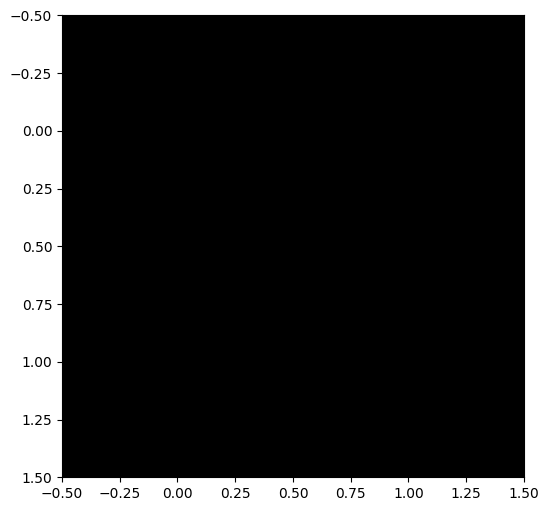

In [38]:
plt.figure(figsize = (6,6))
plt.imshow(Mask, cmap = 'gray')
plt.show()

In [39]:
red_mask = np.dstack([Mask, np.zeros_like(Mask), np.zeros_like(Mask)])

print(red_mask.shape)

(2, 2, 3)


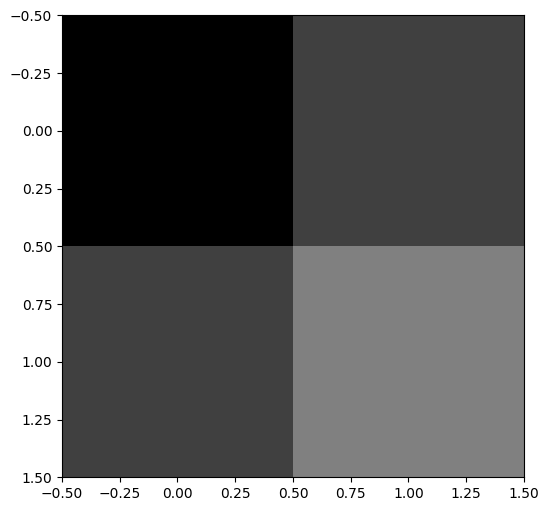

In [40]:

plt.figure(figsize = (6,6))
plt.imshow(I, cmap = 'gray')
plt.imshow(red_mask, alpha = 0.5, cmap = 'gray')
plt.show()


## A bit of Io

### From and to text

In [41]:
data = np.loadtxt('./Data/ejemplo_texto_tabla.txt', delimiter = ',', skiprows = 7)
data.shape

FileNotFoundError: ./Data/ejemplo_texto_tabla.txt not found.

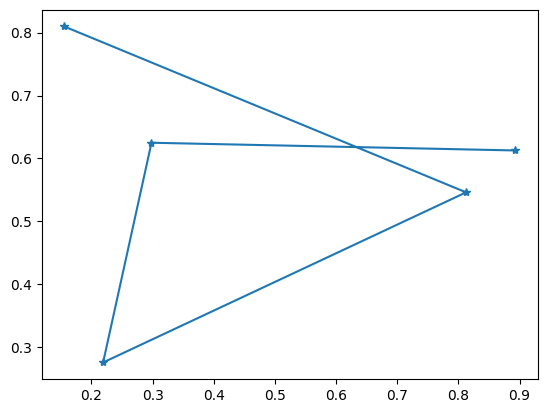

In [42]:
plt.figure()
plt.plot(data[:,0], data[:,1], '-*')
plt.show()

(5,)


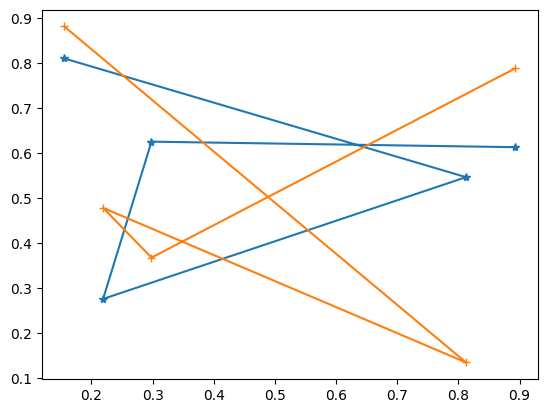

In [43]:
z = -np.cos(data[:,0])

print(z.shape)

nueva_data = np.concatenate([data, z[:,np.newaxis]], axis = 1)

plt.figure()
plt.plot(nueva_data[:,0], nueva_data[:,1], '-*')
plt.plot(nueva_data[:,0], nueva_data[:,2], '-+')
plt.show()

In [44]:
mi_header = "Este es un ejemplo de header\ncon más de una línea\n\nx, y, z\n\n"

np.savetxt('otro_ejemplo.txt', nueva_data, delimiter=',', header = mi_header) 

### Own formats

In [45]:
X = np.ones((3, 3))

np.save('mi_array.npy', X)

In [46]:
X2 = np.load('mi_array.npy')

print(X2)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [47]:
Y = 2*X
Z = Y + 23

np.savez('mis_arrays.npz', a = X, b = Y, c = Z)

In [48]:
data = np.load('mis_arrays.npz')

print(data['a'])
print(data['b'])
print(data['c'])

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]
[[25. 25. 25.]
 [25. 25. 25.]
 [25. 25. 25.]]
